## Import

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

## Initial condition

In [80]:
T = 0.1
L = 1.0
alpha = 0.01
Nx = 50
Nt = 100
dx = L / (Nx - 1)
dt = T / Nt
learning_rate = 0.001
num_epochs = 500
noise_level = 0.05
t1 = 0.1
num_samples = 100

## Our Grid

In [81]:
x = np.linspace(0, L, Nx)
x

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

## Our function

In [82]:
u0 = np.sin(np.pi * x)
u0

array([0.00000000e+00, 6.40702200e-02, 1.27877162e-01, 1.91158629e-01,
       2.53654584e-01, 3.15108218e-01, 3.75267005e-01, 4.33883739e-01,
       4.90717552e-01, 5.45534901e-01, 5.98110530e-01, 6.48228395e-01,
       6.95682551e-01, 7.40277997e-01, 7.81831482e-01, 8.20172255e-01,
       8.55142763e-01, 8.86599306e-01, 9.14412623e-01, 9.38468422e-01,
       9.58667853e-01, 9.74927912e-01, 9.87181783e-01, 9.95379113e-01,
       9.99486216e-01, 9.99486216e-01, 9.95379113e-01, 9.87181783e-01,
       9.74927912e-01, 9.58667853e-01, 9.38468422e-01, 9.14412623e-01,
       8.86599306e-01, 8.55142763e-01, 8.20172255e-01, 7.81831482e-01,
       7.40277997e-01, 6.95682551e-01, 6.48228395e-01, 5.98110530e-01,
       5.45534901e-01, 4.90717552e-01, 4.33883739e-01, 3.75267005e-01,
       3.15108218e-01, 2.53654584e-01, 1.91158629e-01, 1.27877162e-01,
       6.40702200e-02, 1.22464680e-16])

## Euler method:

u<sub>n + 1, i</sub> = u<sub>n, i</sub> + alpha * (dt / dx^2^) * (u<sub>n, i - 1</sub> - 2 * u<sub>n, i</sub> + u<sub>n, i + 1</sub>)


In [83]:
def euler(u, alpha, dx, dt):
    for n in range(0, Nt - 1):
        u[n + 1, 1:-1] = u[n, 1:-1] + alpha * dt / dx**2 * (u[n, 2:] - 2 * u[n, 1:-1] + u[n, :-2])
    return u

## Solving

In [84]:
u = np.zeros((Nt, Nx))
u[0, :] = u0
u

array([[0.00000000e+00, 6.40702200e-02, 1.27877162e-01, ...,
        1.27877162e-01, 6.40702200e-02, 1.22464680e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [85]:
u = euler(u, alpha, dx, dt)
u

array([[0.00000000e+00, 6.40702200e-02, 1.27877162e-01, ...,
        1.27877162e-01, 6.40702200e-02, 1.22464680e-16],
       [0.00000000e+00, 6.40638987e-02, 1.27864545e-01, ...,
        1.27864545e-01, 6.40638987e-02, 0.00000000e+00],
       [0.00000000e+00, 6.40575780e-02, 1.27851930e-01, ...,
        1.27851930e-01, 6.40575780e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 6.34599476e-02, 1.26659125e-01, ...,
        1.26659125e-01, 6.34599476e-02, 0.00000000e+00],
       [0.00000000e+00, 6.34536864e-02, 1.26646628e-01, ...,
        1.26646628e-01, 6.34536864e-02, 0.00000000e+00],
       [0.00000000e+00, 6.34474260e-02, 1.26634133e-01, ...,
        1.26634133e-01, 6.34474260e-02, 0.00000000e+00]])

## Take the all the data where time is equal to 0.1

In [86]:
# data_t1 = u[int(t1 / dt), :]
# data_t1

In [87]:
index = min(int(0.1 / dt), Nt - 1)
data_t1 = u[index, :]
data_t1

array([0.        , 0.06344743, 0.12663413, 0.18930047, 0.25118894,
       0.31204521, 0.37161923, 0.42966618, 0.48594754, 0.54023203,
       0.5922966 , 0.6419273 , 0.68892017, 0.73308213, 0.7742317 ,
       0.81219978, 0.84683036, 0.87798113, 0.90552408, 0.92934605,
       0.94934913, 0.96545113, 0.97758589, 0.98570354, 0.98977072,
       0.98977072, 0.98570354, 0.97758589, 0.96545113, 0.94934913,
       0.92934605, 0.90552408, 0.87798113, 0.84683036, 0.81219978,
       0.7742317 , 0.73308213, 0.68892017, 0.6419273 , 0.5922966 ,
       0.54023203, 0.48594754, 0.42966618, 0.37161923, 0.31204521,
       0.25118894, 0.18930047, 0.12663413, 0.06344743, 0.        ])

## Add some noise

In [88]:
data_t1_noisy = data_t1 + noise_level * np.random.normal(size=data_t1.shape)
data_t1_noisy

array([-0.07321358,  0.03066994,  0.10011383,  0.17576875,  0.26279624,
        0.34168025,  0.37343959,  0.45115502,  0.50550602,  0.53462387,
        0.61659235,  0.67052873,  0.58303774,  0.75375313,  0.72261349,
        0.73435894,  0.77624689,  0.82206981,  0.89557184,  0.89086648,
        0.91720054,  0.97383981,  1.03083466,  0.99526834,  1.09202191,
        0.87736571,  1.06281731,  0.94284547,  0.98836498,  0.88406212,
        1.01768851,  0.93477573,  0.79301823,  0.82124359,  0.79649341,
        0.87847059,  0.77559017,  0.72844606,  0.6294815 ,  0.62336325,
        0.55175365,  0.52824936,  0.37225343,  0.39503505,  0.3498307 ,
        0.26199145,  0.25978457,  0.21645179,  0.07920636,  0.01588507])

## Training data

In [89]:
X_train = np.array([data_t1_noisy + noise_level * np.random.normal(size=data_t1_noisy.shape) for _ in range(num_samples)])
y_train = np.array([u0 for _ in range(num_samples)])

In [90]:
X_train = X_train.reshape(num_samples, Nx, 1)
X_train

array([[[-0.02633572],
        [ 0.07082294],
        [ 0.15162538],
        ...,
        [ 0.30176022],
        [ 0.11064691],
        [-0.02285664]],

       [[-0.08972923],
        [ 0.02669066],
        [ 0.16203295],
        ...,
        [ 0.23345063],
        [ 0.11443906],
        [ 0.00964654]],

       [[-0.09319557],
        [ 0.05069133],
        [ 0.1106929 ],
        ...,
        [ 0.11603202],
        [ 0.16561359],
        [-0.01029571]],

       ...,

       [[-0.14607847],
        [ 0.01552385],
        [ 0.09569544],
        ...,
        [ 0.18257082],
        [ 0.05058027],
        [ 0.01384215]],

       [[-0.05485587],
        [ 0.06244424],
        [ 0.10992417],
        ...,
        [ 0.2511708 ],
        [ 0.09686068],
        [-0.06120823]],

       [[-0.06882218],
        [ 0.03628789],
        [ 0.13875991],
        ...,
        [ 0.23780085],
        [ 0.0985657 ],
        [-0.03701333]]])

In [91]:
y_train = y_train.reshape(num_samples, Nx, 1)
y_train

array([[[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.40702200e-02],
        [1.22464680e-16]],

       [[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.40702200e-02],
        [1.22464680e-16]],

       [[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.40702200e-02],
        [1.22464680e-16]],

       ...,

       [[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.40702200e-02],
        [1.22464680e-16]],

       [[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.40702200e-02],
        [1.22464680e-16]],

       [[0.00000000e+00],
        [6.40702200e-02],
        [1.27877162e-01],
        ...,
        [1.27877162e-01],
        [6.4070

## CNN Model

In [92]:
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(Nx, 1)), # input
    layers.Conv1D(64, kernel_size=3, activation='relu'), # hidden
    layers.Conv1D(128, kernel_size=3, activation='relu'), # hidden
    layers.Flatten(), # convert to 1d
    layers.Dense(Nx) # output
])

In [93]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
# Loss = MSE(Mean Square Error)
# Optimizer = Adam

## Training Model

In [94]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=num_epochs, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.4239 - val_loss: 0.0994
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0745 - val_loss: 0.0897
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0730 - val_loss: 0.0089
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0120 - val_loss: 0.0349
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0357 - val_loss: 0.0245
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0196 - val_loss: 0.0044
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0056 - val_loss: 0.0121
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0107 - val_loss: 0.0027
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0024 - val_loss: 0.0052
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0040 - val_loss: 0.0010
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0012 - val_l

## Evaluating model

In [103]:
predicted_initial_condition = model.predict(X_train)[0]
predicted_initial_condition

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([ 3.2087166e-03,  6.1549757e-02,  1.2872110e-01,  1.9252416e-01,
        2.5589308e-01,  3.1221923e-01,  3.7960067e-01,  4.3034971e-01,
        4.9371144e-01,  5.4467714e-01,  5.9936237e-01,  6.5148830e-01,
        7.0326847e-01,  7.3531055e-01,  7.8424209e-01,  8.2727647e-01,
        8.5206336e-01,  8.8373280e-01,  9.1244775e-01,  9.3787956e-01,
        9.6396703e-01,  9.7099441e-01,  9.8626614e-01,  9.9448043e-01,
        9.9928778e-01,  1.0050249e+00,  9.9564326e-01,  9.8985666e-01,
        9.7557008e-01,  9.6311736e-01,  9.3945527e-01,  9.1462231e-01,
        8.8512295e-01,  8.5028940e-01,  8.2722783e-01,  7.8512609e-01,
        7.4169195e-01,  6.9194460e-01,  6.4690912e-01,  5.9757417e-01,
        5.4720128e-01,  4.8995855e-01,  4.3202621e-01,  3.7477744e-01,
        3.1343901e-01,  2.4532561e-01,  1.8941432e-01,  1.2790583e-01,
        6.5541454e-02, -3.3702544e-04], dtype=float32)

## Ploting

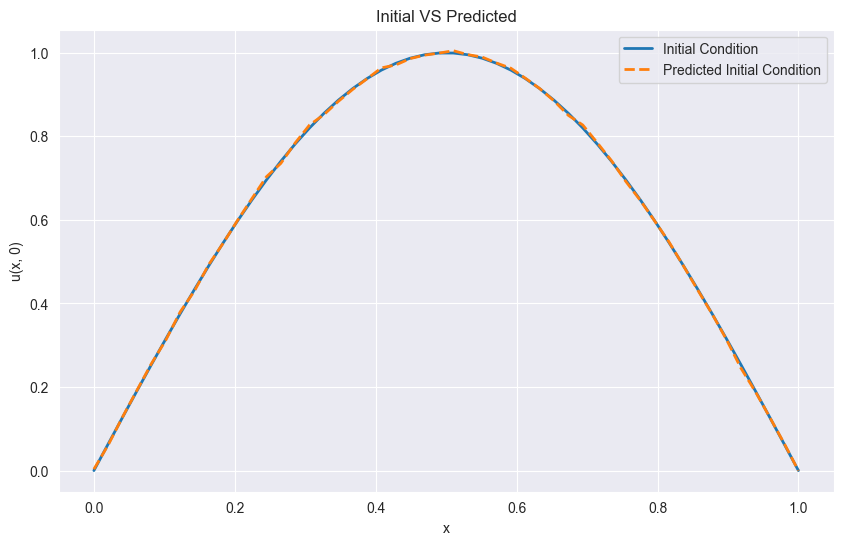

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(x, u0, label='Initial Condition', linewidth=2)
plt.plot(x, predicted_initial_condition, label='Predicted Initial Condition', linestyle='--', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x, 0)')
plt.title('Initial VS Predicted')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


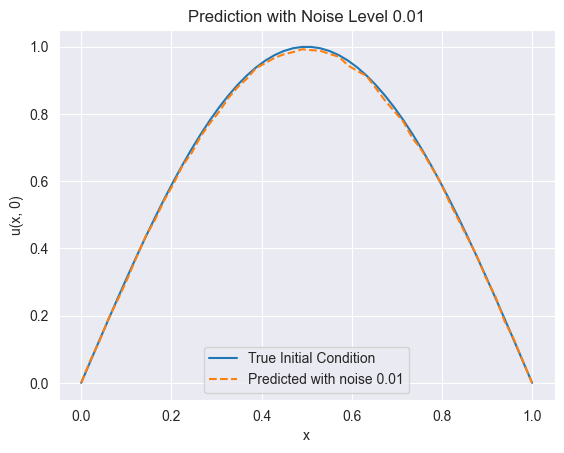

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


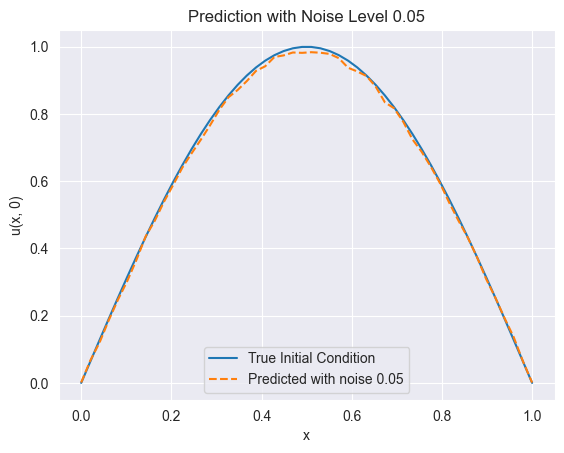

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


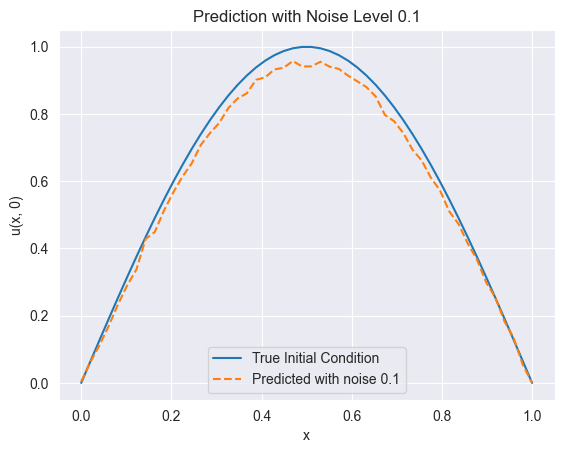

In [107]:
noise_levels = [0.01, 0.05, 0.1]
for noise in noise_levels:
    noisy_data = data_t1 + noise * np.random.normal(size=data_t1.shape)
    noisy_data = noisy_data.reshape(1, Nx, 1)
    prediction = model.predict(noisy_data)[0]
    plt.figure()
    plt.plot(x, u0, label='True Initial Condition')
    plt.plot(x, prediction, label=f'Predicted with noise {noise}', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('u(x, 0)')
    plt.title(f'Prediction with Noise Level {noise}')
    plt.legend()
    plt.grid(True)
    plt.show()

## It's time for experementations

In [110]:
architectures = [
    [layers.Conv1D(16, kernel_size=3, activation='relu', input_shape=(Nx, 1)),
     layers.Conv1D(32, kernel_size=3, activation='relu'),
     layers.Flatten(),
     layers.Dense(Nx)],

    [layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(Nx, 1)),
     layers.Conv1D(64, kernel_size=5, activation='relu'),
     layers.Conv1D(128, kernel_size=3, activation='relu'),
     layers.Flatten(),
     layers.Dense(Nx)],

    [layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(Nx, 1)),
     layers.Conv1D(128, kernel_size=3, activation='relu'),
     layers.Conv1D(256, kernel_size=3, activation='relu'),
     layers.Flatten(),
     layers.Dense(Nx)],

    [layers.Conv1D(32, kernel_size=7, activation='relu', input_shape=(Nx, 1)),
     layers.Conv1D(64, kernel_size=5, activation='relu'),
     layers.Conv1D(128, kernel_size=3, activation='relu'),
     layers.Conv1D(256, kernel_size=3, activation='relu'),
     layers.Flatten(),
     layers.Dense(Nx)],

    [layers.Conv1D(128, kernel_size=3, activation='relu', input_shape=(Nx, 1)),
     layers.Conv1D(256, kernel_size=3, activation='relu'),
     layers.Conv1D(512, kernel_size=3, activation='relu'),
     layers.Flatten(),
     layers.Dense(Nx)],

    [layers.Conv1D(16, kernel_size=5, activation='relu', input_shape=(Nx, 1)),
     layers.Conv1D(32, kernel_size=5, activation='relu'),
     layers.Conv1D(64, kernel_size=5, activation='relu'),
     layers.Conv1D(128, kernel_size=5, activation='relu'),
     layers.Flatten(),
     layers.Dense(Nx)],

    [layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(Nx, 1)),
     layers.Conv1D(128, kernel_size=3, activation='relu'),
     layers.Conv1D(128, kernel_size=3, activation='relu'),
     layers.Conv1D(64, kernel_size=3, activation='relu'),
     layers.Flatten(),
     layers.Dense(Nx)]
]


Training architecture 1
Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - loss: 0.4790 - val_loss: 0.2882
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2556 - val_loss: 0.1145
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0950 - val_loss: 0.0284
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0268 - val_loss: 0.0352
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0369 - val_loss: 0.0374
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0332 - val_loss: 0.0166
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0138 - val_loss: 0.0077
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0078 - val_loss: 0.0096
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0093 - val_loss: 0.0056
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


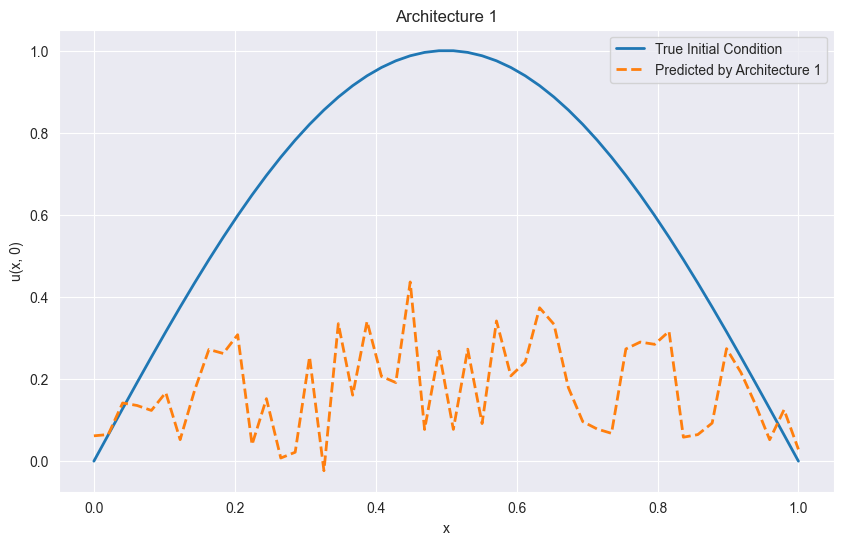


Training architecture 2
Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - loss: 0.4222 - val_loss: 0.0931
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0742 - val_loss: 0.0762
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0595 - val_loss: 0.0118
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0161 - val_loss: 0.0352
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0340 - val_loss: 0.0182
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0145 - val_loss: 0.0068
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0082 - val_loss: 0.0101
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0080 - val_loss: 0.0013
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0020 - val_loss: 0.0060
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0058 - val_loss: 0.0029
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


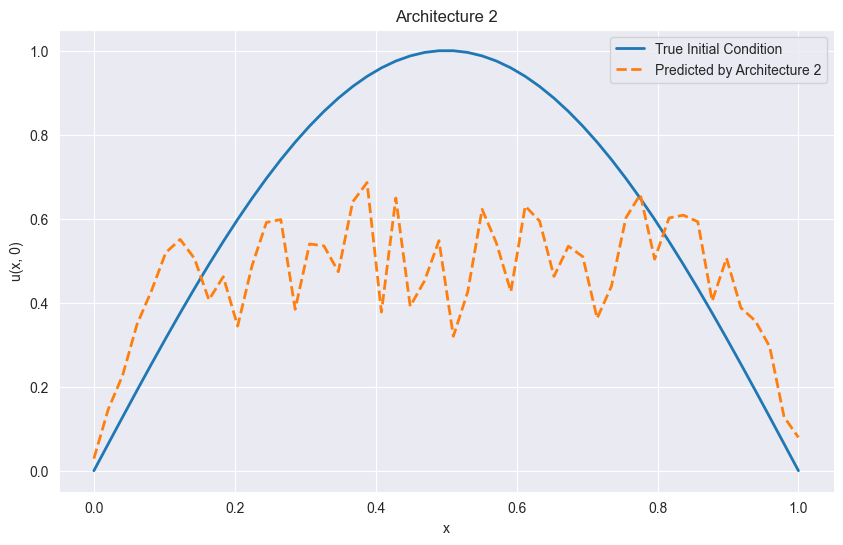


Training architecture 3
Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.3715 - val_loss: 0.0677
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0709 - val_loss: 0.0098
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0185 - val_loss: 0.0426
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0360 - val_loss: 0.0061
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0075 - val_loss: 0.0147
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0112 - val_loss: 0.0020
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0038 - val_loss: 0.0090
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0077 - val_loss: 0.0022
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0026 - val_loss: 0.0038
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0028 - val_loss: 7.5240e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


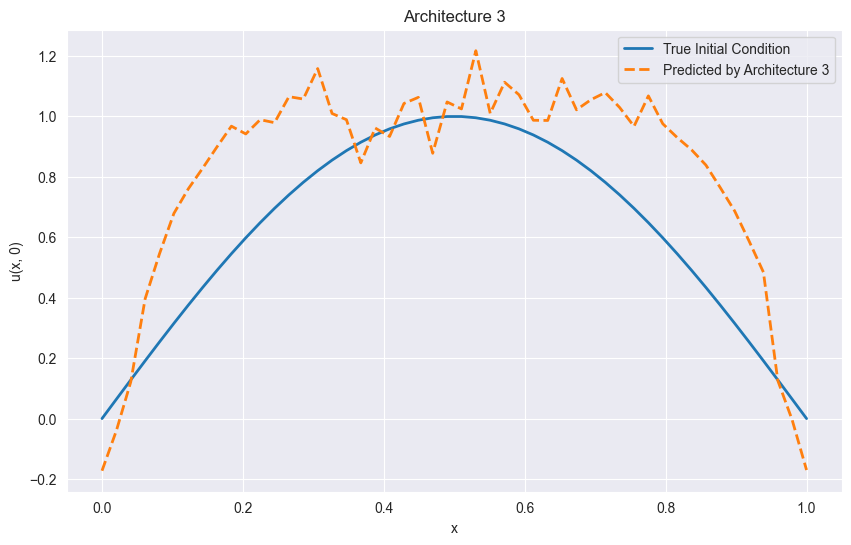


Training architecture 4
Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - loss: 0.4244 - val_loss: 0.0513
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0838 - val_loss: 0.0108
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0141 - val_loss: 0.0565
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0550 - val_loss: 0.0261
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0219 - val_loss: 0.0220
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0195 - val_loss: 0.0019
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0024 - val_loss: 0.0106
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0107 - val_loss: 0.0060
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0055 - val_loss: 0.0060
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0053 - val_loss: 7.9714e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


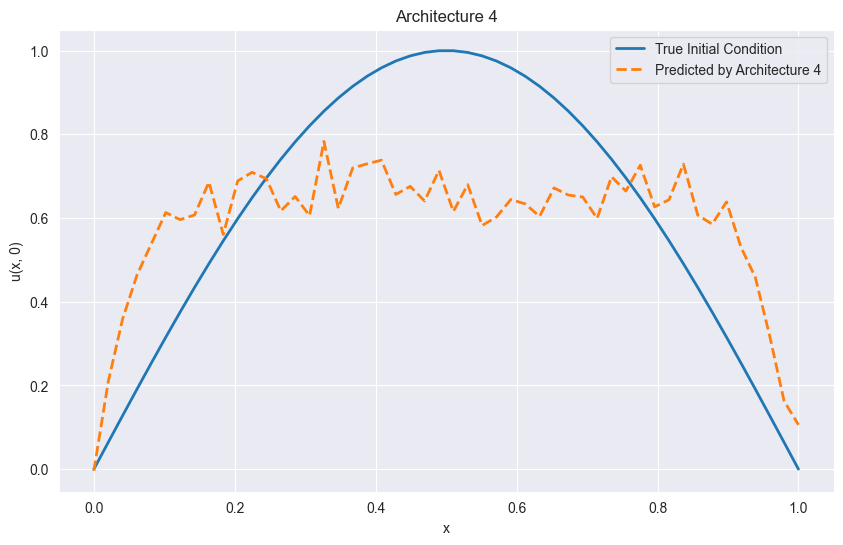


Training architecture 5
Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - loss: 0.3595 - val_loss: 0.0771
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0497 - val_loss: 0.0494
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0404 - val_loss: 0.0205
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0183 - val_loss: 0.0016
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0050 - val_loss: 0.0076
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0067 - val_loss: 0.0077
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0055 - val_loss: 0.0025
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0014 - val_loss: 0.0017
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


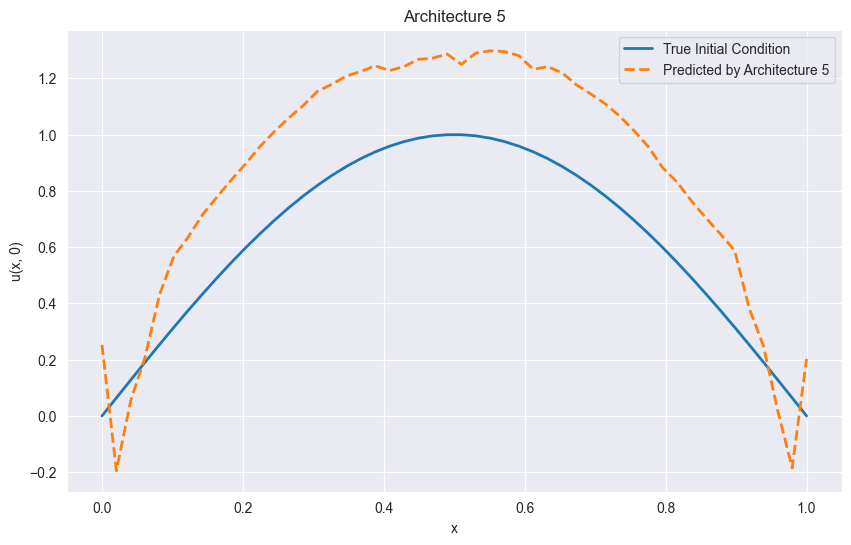


Training architecture 6
Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - loss: 0.4460 - val_loss: 0.0641
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0691 - val_loss: 0.0349
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0248 - val_loss: 0.0382
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0414 - val_loss: 0.0278
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0219 - val_loss: 0.0123
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0131 - val_loss: 0.0054
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0039 - val_loss: 0.0067
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0075 - val_loss: 0.0052
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0041 - val_loss: 0.0012
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


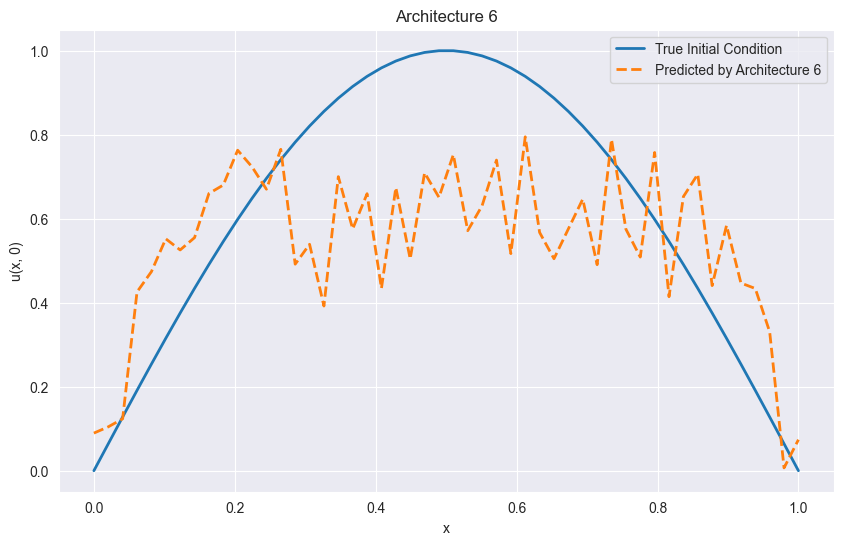


Training architecture 7
Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - loss: 0.4499 - val_loss: 0.1566
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1165 - val_loss: 0.0895
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0583 - val_loss: 0.0230
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0323 - val_loss: 0.0452
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0384 - val_loss: 0.0139
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0156 - val_loss: 0.0143
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0101 - val_loss: 0.0032
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0052 - val_loss: 0.0092
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0080 - val_loss: 0.0039
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0043 - val_loss: 0.0041
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


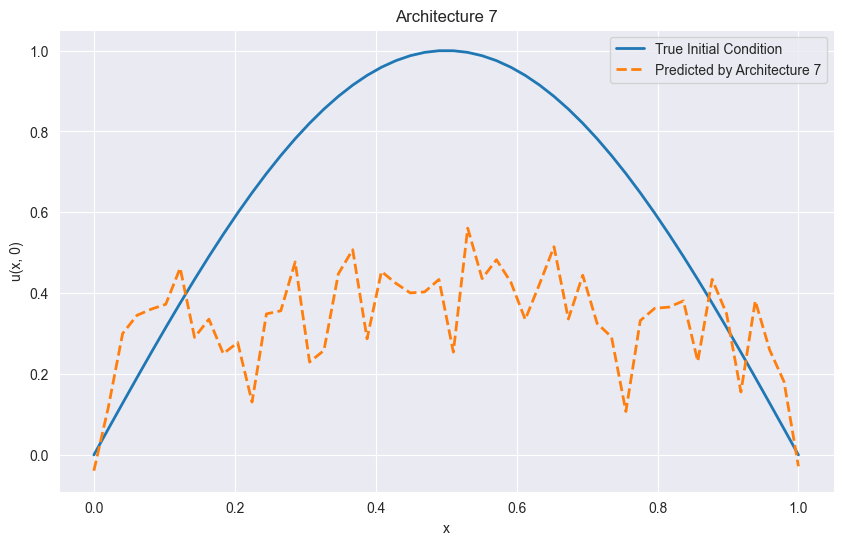

In [111]:
for i, arch in enumerate(architectures):
    print(f"\nTraining architecture {i + 1}")
    model = models.Sequential(arch)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    history = model.fit(X_train, y_train, epochs=num_epochs, verbose=1, validation_split=0.2, callbacks=[early_stopping])
    predicted_initial_condition = model.predict(X_train)[0]
    plt.figure(figsize=(10, 6))
    plt.plot(x, u0, label='True Initial Condition', linewidth=2)
    plt.plot(x, predicted_initial_condition, label=f'Predicted by Architecture {i + 1}', linestyle='--', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('u(x, 0)')
    plt.title(f'Architecture {i + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()

# So, ┐(￣ヘ￣)┌